In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import AdamW
import keras.callbacks
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_disease_train.csv')
test = pd.read_csv('heart_disease_test.csv')
sub = pd.read_csv('sample_submission.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   952 non-null    int64  
 1   age                  952 non-null    float64
 2   sex                  952 non-null    int64  
 3   chest.pain.type      952 non-null    int64  
 4   resting.bp.s         952 non-null    float64
 5   cholesterol          952 non-null    float64
 6   fasting.blood.sugar  952 non-null    int64  
 7   resting.ecg          952 non-null    int64  
 8   max.heart.rate       952 non-null    float64
 9   exercise.angina      952 non-null    int64  
 10  oldpeak              952 non-null    float64
 11  ST.slope             952 non-null    int64  
 12  target               952 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 96.8 KB


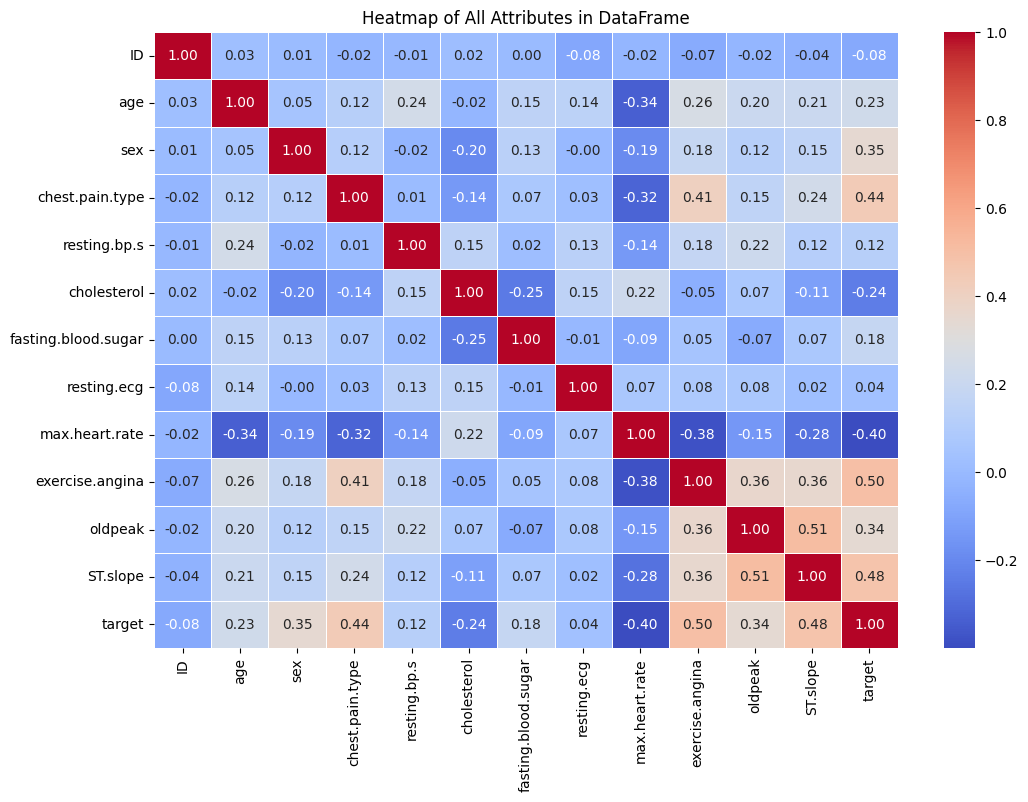

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of All Attributes in DataFrame")
plt.show()

In [5]:
df.columns

Index(['ID', 'age', 'sex', 'chest.pain.type', 'resting.bp.s', 'cholesterol',
       'fasting.blood.sugar', 'resting.ecg', 'max.heart.rate',
       'exercise.angina', 'oldpeak', 'ST.slope', 'target'],
      dtype='object')

In [6]:
X = df.drop('target', axis=1).values
y = df['target'].values

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

model = keras.Sequential()

# Input layer
model.add(Input(shape=(X.shape[1],)))

# Hidden layers
model.add(Dense(256, activation=None))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dense(128, activation=None))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(64, activation=None))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dense(32, activation=None))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=AdamW(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(
    X, y,
    validation_split=0.25,
    epochs=150,
    batch_size=128,
    verbose=0
)

train_loss, train_accuracy = model.evaluate(X, y, verbose=0)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
y_pred_train = (model.predict(X) > 0.5).astype("int32")
train_accuracy = accuracy_score(y, y_pred_train)

print(f"Final Train Accuracy: {train_accuracy*100:.2f}%")

Train Accuracy: 93.80%
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Final Train Accuracy: 93.80%


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   238 non-null    int64  
 1   age                  238 non-null    float64
 2   sex                  238 non-null    int64  
 3   chest.pain.type      238 non-null    int64  
 4   resting.bp.s         238 non-null    float64
 5   cholesterol          238 non-null    float64
 6   fasting.blood.sugar  238 non-null    int64  
 7   resting.ecg          238 non-null    int64  
 8   max.heart.rate       238 non-null    float64
 9   exercise.angina      238 non-null    int64  
 10  oldpeak              238 non-null    float64
 11  ST.slope             238 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 22.4 KB


In [8]:
test = scaler.transform(test)

In [9]:
y_pred = (model.predict(test) > 0.5).astype("int32")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [10]:
sub['target'] = y_pred

In [11]:
sub.to_csv('submission.csv', index=False)